In [1]:
#Lets import PCA technique
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to the categorical columns
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['day'] = le.fit_transform(data['day'])
data['time'] = le.fit_transform(data['time'])

print(data)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    2     0     2
1         10.34  1.66    1       0    2     0     3
2         21.01  3.50    1       0    2     0     3
3         23.68  3.31    1       0    2     0     2
4         24.59  3.61    0       0    2     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    3     0     2

[244 rows x 7 columns]


In [4]:
x=data.drop(columns='tip')
y=data.tip

In [5]:
# scaling the data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [6]:
# creating the class for pca and initialising it
pca=PCA()
pca.fit_transform(x_scaled)

array([[-0.64825187, -0.391193  , -0.14701599, -1.45843528,  0.58118349,
        -0.53326811],
       [-0.03672532,  0.02257671, -1.40831566, -0.05840716, -0.80855313,
        -0.57268766],
       [ 0.48424518,  0.62075703, -1.06174552,  0.00339783, -0.01338455,
        -0.33397486],
       ...,
       [ 1.16976895, -1.08075629,  0.39103161,  0.94435273,  0.30179418,
        -0.02892948],
       [ 0.53387373, -0.69995435, -1.26215372, -0.09473659,  0.28306973,
         0.38954687],
       [-1.10713763,  0.20332829, -0.10652371, -1.20058864,  0.90726214,
        -1.21961039]])

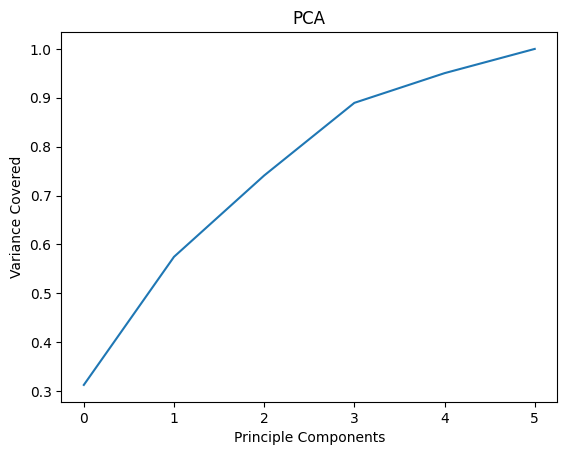

In [7]:
#Lets plot scree plot to check the best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [8]:
#Lets select how many Pricipal components we want
pca=PCA(n_components=6)
new_pump=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pump,
                        columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [ ]:
# checking the prin